## Model Test
ipynb for testing lstm model

In [ ]:
# from google.colab import files
# uploaded = files.upload()

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


### Data Overall Check


In [ ]:
import pandas as pd
import numpy as np

data = pd.read_excel("./drive/MyDrive/Colab Notebooks/Mark1/BitcoinWon.xlsx")
data = data.rename(columns={"날짜":"Date","종가":"Close","시가":"Open","고가":"High","저가":"Low","거래량":"Volume","변동 %":"Rate"})

reversed_idx = [i for i in range(data.shape[0]-1,-1,-1)]
data = pd.DataFrame(data,index=reversed_idx)
data = data.reset_index(drop=True)

data.drop("Volume",axis=1,inplace=True)
print(data.head())
print(data.shape)
print(data.info())

        Date    Close     Open     High      Low    Rate
0 2017-05-23  3206000  3104000  3281000  3081000  0.0329
1 2017-05-24  4175000  3206000  4314000  3206000  0.3022
2 2017-05-25  4199000  4175000  4840000  3102000  0.0057
3 2017-05-26  3227000  4199000  4200000  2900000 -0.2315
4 2017-05-27  3152000  3227000  3288000  2460000 -0.0232
(2177, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2177 entries, 0 to 2176
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2177 non-null   datetime64[ns]
 1   Close   2177 non-null   int64         
 2   Open    2177 non-null   int64         
 3   High    2177 non-null   int64         
 4   Low     2177 non-null   int64         
 5   Rate    2177 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(4)
memory usage: 102.2 KB
None


### Data Split ( 7:3 )

In [ ]:
# 70% Train
# 30% Test
train_data_x = data.iloc[:int(data.shape[0]*0.7),:]
train_data_y = data["Close"].iloc[1:int(data.shape[0]*0.7+1):]
train_data_x = train_data_x.reset_index(drop=True)
train_data_y = train_data_y.reset_index(drop=True)
# print(train_data_x.tail())
# print(train_data_y.tail())
train_data_x.drop("Date",axis=1,inplace=True)
train_data_x = np.array(train_data_x)
train_data_y = np.array(train_data_y)

test_data_x = data.iloc[int(data.shape[0]*0.7):data.shape[0]-1:]
test_data_y = data["Close"].iloc[int(data.shape[0]*0.7)+1:]
test_data_x = test_data_x.reset_index(drop=True)
test_data_y = test_data_y.reset_index(drop=True)
# print(test_data_x.head())
# print(test_data_y.tail())
test_data_x.drop("Date",axis=1,inplace=True)
test_data_x = np.array(test_data_x)
test_data_y = np.array(test_data_y)

time_step = 30

high_test_data_y = data["High"].iloc[int(data.shape[0]*0.7)+1:]
high_test_data_y = high_test_data_y.reset_index(drop=True)
def highTestData(dataset,look_back):
  data = []
  for i in range(len(dataset)-look_back):
    data.append(dataset[i+look_back-1])
  return np.array(data)
high_test_data_y = highTestData(high_test_data_y,time_step)
# print(high_test_data_y)

def create_dataset(datasetX,datasetY, look_back):
  dataX, dataY = [], []
  for i in range(len(datasetX)-look_back):
    a = datasetX[i:(i+look_back)]
    dataX.append(a)
    dataY.append(datasetY[i+look_back-1])
  return np.array(dataX), np.array(dataY)
trainX,trainY = create_dataset(train_data_x,train_data_y,time_step)
testX,testY = create_dataset(test_data_x,test_data_y,time_step)
# print(testX)
# print(testY)
# print(trainX[-2],trainX[-1])
# print(trainY)

In [ ]:
shaped_trainX = trainX.reshape(trainX.shape[0],time_step,5)
shaped_testX = testX.reshape(testX.shape[0],time_step,5)
print(shaped_trainX.shape)

(1493, 30, 5)


### Loading Model by Name

In [ ]:
import tensorflow as tf
###############
model_Name = "mark1"
###############
model = tf.keras.models.load_model(f'./drive/MyDrive/Colab Notebooks/Mark1/saved_model/{model_Name}')

20/20 [==============================] - 0s 5ms/step


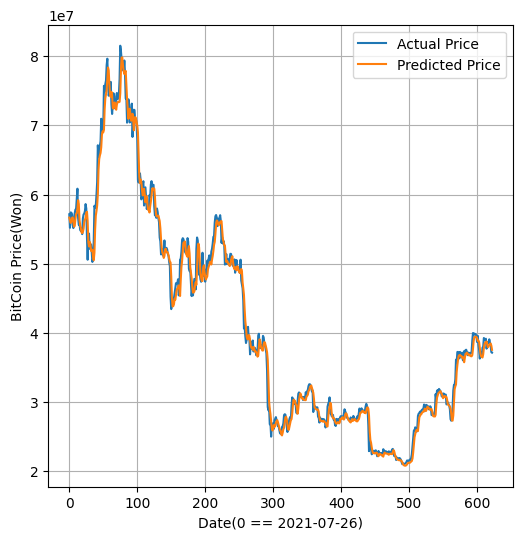

Mean of Error Rate: 2.45 %
Below 5% of Error Rate: 91.3 %
Predicted Price / Actual Price: 0.994


In [ ]:
import matplotlib.pyplot as plt

testPredictY = model.predict(shaped_testX)
var1 = testY
var2 = testPredictY.T[0]
graphX = [i for i in range(len(var1))]
plt.figure(figsize=(6,6))
plt.plot(graphX,var1)
plt.plot(graphX,var2)
plt.ylabel(ylabel="BitCoin Price(Won)")
plt.xlabel(xlabel="Date(0 == 2021-07-26)")
plt.legend(["Actual Price","Predicted Price"])
plt.grid()
plt.show()

# print(var1[:10])
# print(var2[:10])
accuracy = (np.absolute(var2-var1))/var1
howClose = (var2/var1)
print(f"Mean of Error Rate: {np.round(accuracy.mean(),4)*100} %")
print(f"Below 5% of Error Rate: {round(np.count_nonzero(np.round(accuracy,2)<=0.05)/accuracy.shape[0],3)*100} %")
print(f"Predicted Price / Actual Price: {round(howClose.mean(),3)}")
